# 9. Neural Networks with MNIST

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 9.1 Prepare MNIST Data

In [3]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [4]:
mnist_train.data.size(), mnist_test.data.size()

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

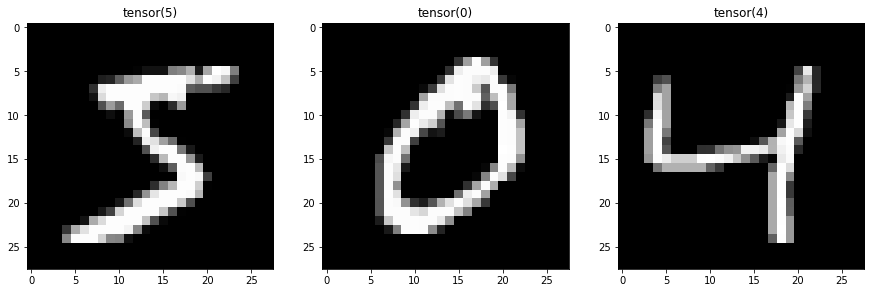

In [5]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(mnist_train.targets[0])
ax1.imshow(mnist_train.data[0,:,:].numpy(), cmap='gray')

ax2.set_title(mnist_train.targets[1])
ax2.imshow(mnist_train.data[1,:,:].numpy(), cmap='gray')

ax3.set_title(mnist_train.targets[2])
ax3.imshow(mnist_train.data[2,:,:].numpy(), cmap='gray')

## 9.2 Make Batch Loader

In [6]:
batch_size = 100

data_loader  = torch.utils.data.DataLoader(dataset=mnist_train, 
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

# dataset (Dataset) – dataset from which to load the data.
# batch_size (int, optional) – how many samples per batch to load (default: 1).
# shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).
# num_workers (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)

In [7]:
for i in range(3) :
    batch_images, batch_labels = next(iter(data_loader))
    print(batch_labels.numpy(), ", ", len(batch_labels.numpy()))

[9 4 1 2 2 4 2 5 1 5 0 5 8 2 7 9 1 8 8 4 9 7 5 7 7 3 7 5 8 9 0 0 3 2 6 7 0
 1 8 3 2 3 8 5 7 1 1 4 5 6 2 7 3 7 8 0 7 7 9 0 0 4 2 7 1 4 6 6 6 4 2 8 5 7
 9 3 3 0 1 8 6 2 4 6 1 0 0 5 7 8 0 3 1 1 6 4 6 9 2 4] ,  100
[3 2 7 6 4 4 2 9 1 9 1 7 7 5 8 4 3 3 1 6 6 8 5 6 1 9 7 6 1 7 3 9 6 6 5 5 9
 1 7 1 7 3 8 0 1 7 0 6 0 4 8 2 0 5 9 7 4 5 5 7 1 8 5 3 7 5 9 3 7 8 2 9 7 3
 5 1 7 8 1 9 2 7 0 8 3 8 7 7 8 7 5 0 9 9 2 3 6 3 0 3] ,  100
[6 2 1 2 5 4 4 3 9 5 8 6 1 7 8 6 6 5 8 9 4 0 4 8 1 3 4 3 6 2 7 4 2 7 3 9 9
 7 0 0 9 4 5 5 1 7 1 5 3 4 7 8 8 0 3 2 0 7 9 9 6 7 1 7 3 0 7 0 1 7 4 6 2 8
 8 1 1 2 9 1 7 9 7 7 8 8 6 2 8 1 6 4 8 1 9 1 6 8 6 6] ,  100


In [8]:
batch_images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2118, 0.9333,
          0.5529, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0392, 0.9020, 0.9961,
          0.8078, 0.0275, 0.0000, 0.0000, 0.0000, 0.0000,

## 9.3 Define Model

In [9]:
linear1 = torch.nn.Linear(784, 512, bias = True)
relu = torch.nn.ReLU()
linear2 = torch.nn.Linear(512, 10, bias = True)

model = torch.nn.Sequential(linear1, relu, linear2)

In [10]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# def cross_entropy(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True):

# Args:
#     input: Variable :math:`(N, C)` where `C = number of classes`
#     target: Variable :math:`(N)` where each value is
#         `0 <= targets[i] <= C-1`
#     weight (Tensor, optional): a manual rescaling weight given to each

## 9.4 Train Model

In [11]:
num_epochs = 5

In [12]:
for epoch in range(num_epochs):
    
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        X = batch_images.view(-1, 28 * 28)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/5], lter [100/600], Loss: 2.2599
Epoch [1/5], lter [200/600], Loss: 2.2597
Epoch [1/5], lter [300/600], Loss: 2.2176
Epoch [1/5], lter [400/600], Loss: 2.2122
Epoch [1/5], lter [500/600], Loss: 2.1769
Epoch [1/5], lter [600/600], Loss: 2.1248
Epoch [2/5], lter [100/600], Loss: 2.1491
Epoch [2/5], lter [200/600], Loss: 2.1066
Epoch [2/5], lter [300/600], Loss: 2.0558
Epoch [2/5], lter [400/600], Loss: 2.0675
Epoch [2/5], lter [500/600], Loss: 2.0435
Epoch [2/5], lter [600/600], Loss: 1.9927
Epoch [3/5], lter [100/600], Loss: 1.9282
Epoch [3/5], lter [200/600], Loss: 1.9427
Epoch [3/5], lter [300/600], Loss: 1.8352
Epoch [3/5], lter [400/600], Loss: 1.9114
Epoch [3/5], lter [500/600], Loss: 1.9040
Epoch [3/5], lter [600/600], Loss: 1.7839
Epoch [4/5], lter [100/600], Loss: 1.7141
Epoch [4/5], lter [200/600], Loss: 1.7436
Epoch [4/5], lter [300/600], Loss: 1.6412
Epoch [4/5], lter [400/600], Loss: 1.6565
Epoch [4/5], lter [500/600], Loss: 1.6198
Epoch [4/5], lter [600/600], Loss:

## 9.5 Test Model

In [13]:
model.eval()

correct = 0
total = 0

for images, labels in mnist_test:
    
    images  = images.view(-1, 28 * 28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 77.820000 %


In [14]:
r = random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.data[r:r + 1].view(-1,28*28).float()
Y_single_data = mnist_test.targets[r:r + 1]

Label :  [6]
Prediction :  [6]


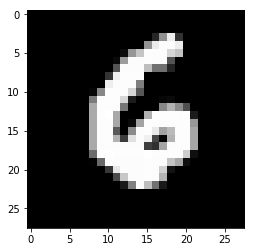

In [15]:
single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())

## 9.6 Black Box

Prediction :  [0]


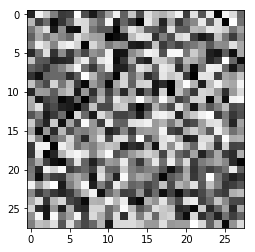

In [16]:
blackbox = torch.rand(X_single_data.size())
blackbox_pre = model(blackbox)

plt.imshow(blackbox.data.view(28,28).numpy(), cmap='gray')

print('Prediction : ', torch.max(blackbox_pre.data, 1)[1].numpy())